<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Itogovyj_blok/Itogovyj_blok_Kondratev_MDS_36_HW_X_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговая работа.

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [ ]:
import sympy as sp

# Определение символьной переменной x
x = sp.symbols('x')

# Определение функции
f = sp.tan(sp.sin(x) + sp.cos(2*x+3))**2

# Вычисление производной
df = sp.diff(f, x)

# Вычисление значения производной в точке x0=1
x0 = 1
df_x0 = df.evalf(subs={x: x0})

# Вывод результата в формате формулы
print(f"Производная функции в точке x0={x0}: {sp.latex(df_x0)}")


Производная функции в точке x0=1: 55.3859176353379


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

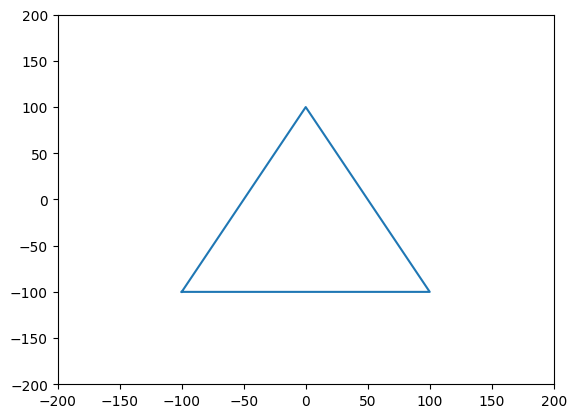

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


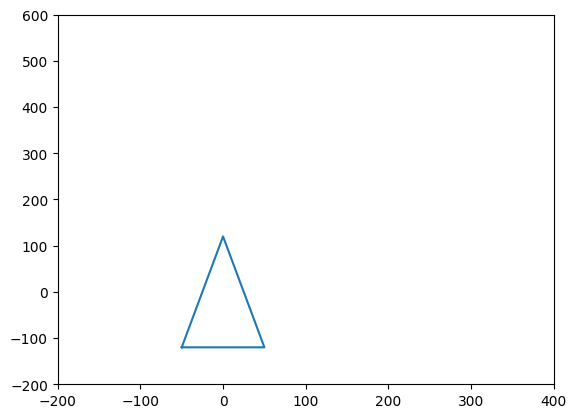

In [ ]:
# Операция масштабирования
scaling_matrix = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])

# Операция смещения
translation_matrix = np.array([
    [1, 0, 200],
    [0, 1, 300],
    [0, 0, 1]
])

# Применение операций масштабирования и смещения
transformed_A = A.dot(scaling_matrix).dot(translation_matrix)

# Извлечение координат x и y после преобразований
x = transformed_A[:, 0]
y = transformed_A[:, 1]

# Визуализация преобразованного объекта
plt.plot(x, y)
plt.ylim([-200, 600])
plt.xlim([-200, 400])
plt.show()

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
import numpy as np

m = np.array([[1, 4],
              [1, 1]])

# Нахождение собственных значений и собственных векторов
eigenvalues, eigenvectors = np.linalg.eig(m)

print("Собственные значения:")
for eigenvalue in eigenvalues:
    print(eigenvalue)

print("\nСобственные векторы:")
for eigenvector in eigenvectors.T:
    print(eigenvector)


Собственные значения:
3.0000000000000004
-0.9999999999999996

Собственные векторы:
[0.89442719 0.4472136 ]
[-0.89442719  0.4472136 ]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

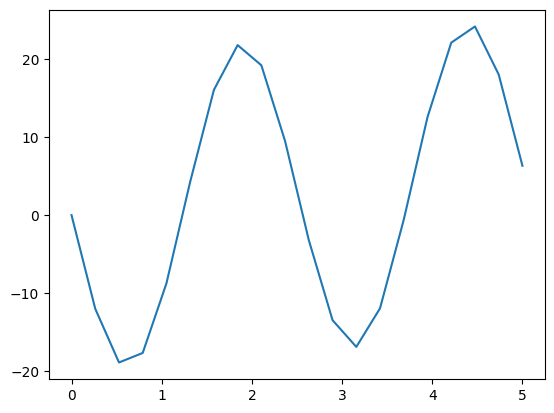

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Оптимальные параметры:
a = 3.000027097303782
b = -2.4999355679339113
Абсолютная ошибка = 0.043631576926070004


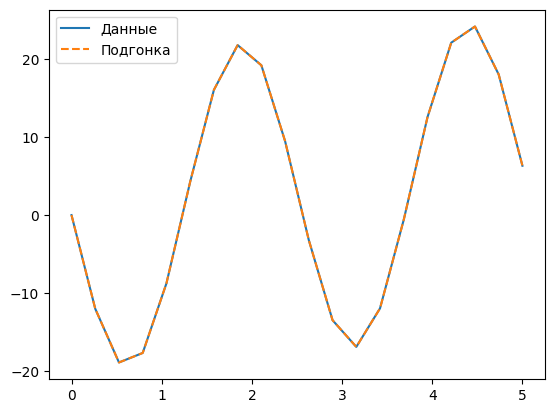

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Начальные параметры
params0 = [0, 0]

# Оптимизация параметров
result = minimize(error, params0, method='COBYLA')

# Оптимальные параметры a и b
optimal_params = result.x
print("Оптимальные параметры:")
print("a =", optimal_params[0])
print("b =", optimal_params[1])

# Вычисление абсолютной ошибки
absolute_error = error(optimal_params)
print("Абсолютная ошибка =", absolute_error)

# График с подгоняемыми данными
plt.plot(x, fx, label='Данные')
plt.plot(x, f(x, optimal_params[0], optimal_params[1]), label='Подгонка', linestyle='--')
plt.legend()
plt.show()


## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [12]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [15]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

# Вычисляем матрицу попарного расстояния между пользователями с использованием косинусной метрики
distances = pairwise_distances(raitings, metric='cosine')

most_similar_users = []
for i in range(distances.shape[0]):
    distances[i, i] = np.inf  # Исключаем себя из рассмотрения
    most_similar_user_index = np.argmin(distances[i])
    most_similar_users.append((i+1, most_similar_user_index+1))

# Выводим результат
print(most_similar_users)

[(1, 9), (2, 5), (3, 10), (4, 10), (5, 9), (6, 10), (7, 4), (8, 6), (9, 1), (10, 3)]
